In [1]:
class Graph:
  def __init__(self):
    self.graph = {}

  def add_friendship(self, person1, person2):
    if person1 not in self.graph:
      self.graph[person1] = []
    if person2 not in self.graph:
      self.graph[person2] = []
    self.graph[person1].append(person2)
    self.graph[person2].append(person1)

  def get_network(self):
      return self.graph

In [2]:
social_network = Graph()
social_network.add_friendship("Ramesh", "Shanti")
social_network.add_friendship("Ramesh", "Rahul")
social_network.add_friendship("Shanti", "Ravi")
social_network.add_friendship("Rahul", "Kavita")
social_network.add_friendship("Ravi", "Shikha")

In [3]:
from collections import deque

In [5]:
def bfs(graph, start_person):
  visited = set()
  queue = deque([start_person])
  traversal_order = []

  while queue:
    person = queue.popleft()

    if person not in visited:
      visited.add(person)
      traversal_order.append(person)

      for friend in graph[person]:
        if friend not in visited:
          queue.append(friend)

  return traversal_order

In [6]:
def dfs(graph, start_person):
  visited = set()
  traversal_order = []

  def dfs_helper(person):
    if person not in visited:
      visited.add(person)
      traversal_order.append(person)

      for friend in graph[person]:
        if friend not in visited:
          dfs_helper(friend)

  dfs_helper(start_person)
  return traversal_order

In [7]:
network = social_network.get_network()

print(f"BFS Traversal starting from Ramesh: ", bfs(network, "Ramesh"))

print(f"DFS Traversal starting from Ramesh: ", dfs(network, "Ramesh"))

BFS Traversal starting from Ramesh:  ['Ramesh', 'Shanti', 'Rahul', 'Ravi', 'Kavita', 'Shikha']
DFS Traversal starting from Ramesh:  ['Ramesh', 'Shanti', 'Ravi', 'Shikha', 'Rahul', 'Kavita']


In [8]:
!pip install networkx matplotlib

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

In [13]:
def visualise_traversal(graph, traversal_order, title):
  G = nx.Graph()

  for person, friends in graph.items():
    G.add_node(person)
    for friend in friends:
      G.add_edge(person, friend)

  pos = nx.spring_layout(G)

  nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold', edge_color='grey')

  edges = [(traversal_order[i], traversal_order[i+1]) for i in range(len(traversal_order)-1)]
  nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=2)

  plt.title(title)
  plt.show()

BFS Traversal Order:  ['Ramesh', 'Shanti', 'Rahul', 'Ravi', 'Kavita', 'Shikha']


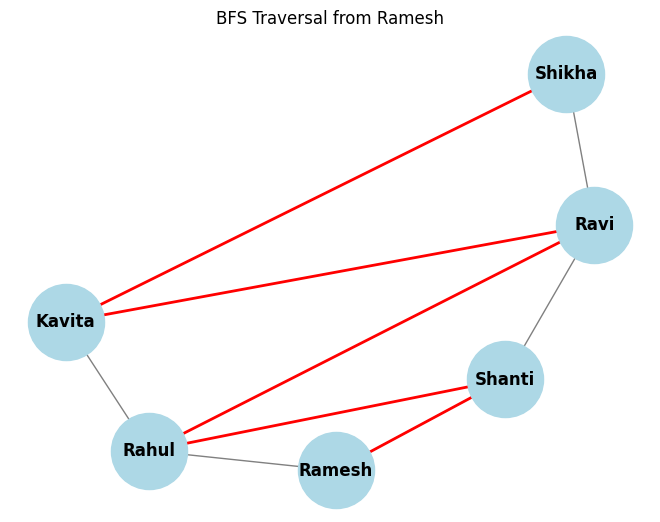

DFS Traversal Order:  ['Ramesh', 'Shanti', 'Ravi', 'Shikha', 'Rahul', 'Kavita']


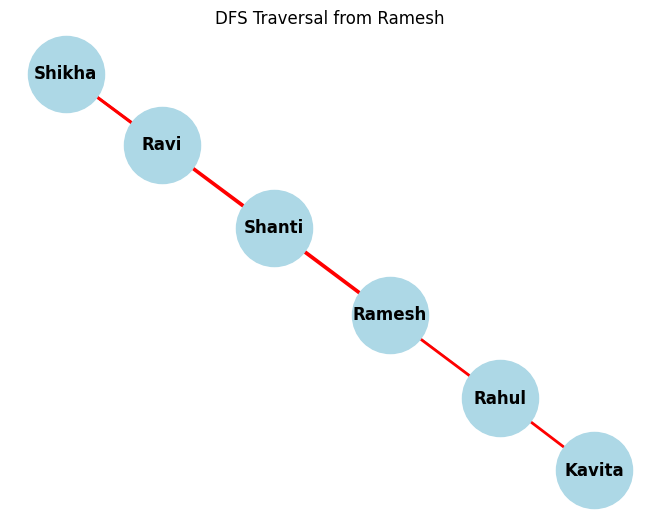

In [14]:
network = social_network.get_network()

bfs_order = bfs(network, "Ramesh")
print("BFS Traversal Order: ", bfs_order)

visualise_traversal(network, bfs_order, "BFS Traversal from Ramesh")

dfs_order = dfs(network, "Ramesh")
print("DFS Traversal Order: ", dfs_order)

visualise_traversal(network, dfs_order, "DFS Traversal from Ramesh")